# Chapter 2: Machine Learning Fundamentals

In this chapter, we will look at some of the fundamental concepts in Machine Learning. To illustrate them, we are going to use a dataset about cars from the 1970s. A preprocessed version of the dataset is available in Moodle. You can find more details about the [original dataset](https://archive.ics.uci.edu/ml/datasets/Auto+MPG) at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php).

## 2.1 Supervised vs. Unsupervised Learning

Nothing to show here.

## 2.2 Feature Types and Encoding

As a first step, we import the dataset, which is stored as a CSV file, using Pandas.

In [32]:
import numpy as np
import pandas as pd
cars = pd.read_csv('../data/auto-mpg.data', header=None, sep='\s+', names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name'])
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
389,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
390,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


## 2.3 Linear Regression

In the first step, we want to use simple linear regression to predict fuel efficiency (mpg) based on the horsepowers of a car. First, we need to extract the relevant features and plot them.

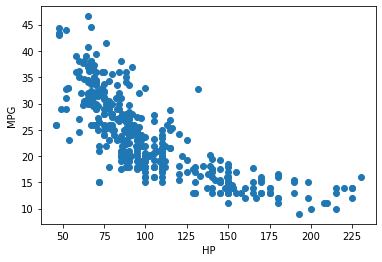

In [33]:
# extract horsepower and mpg
hp, mpg = cars['horsepower'].values, cars['mpg'].values

# plot hp and mpg
import matplotlib.pyplot as plt
plt.scatter(hp, mpg)
plt.xlabel('HP')
plt.ylabel('MPG')
plt.show()

Before training our simple linear regression model, it is a good idea to normalize our data. Here, the normalization is done on the NumPy arrays that have been extracted from the DataFrame provided by Pandas. Later on, we will see how we can normalized directly in Pandas.

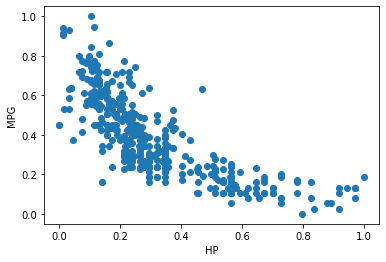

In [34]:
# normalize horsepower and mpg
hp_min, hp_max = min(hp), max(hp)
hp_n = (hp - hp_min) / (hp_max - hp_min)
mpg_min, mpg_max = min(mpg), max(mpg)
mpg_n = (mpg - mpg_min) / (mpg_max - mpg_min)

# plot normalized hp and mpg
import matplotlib.pyplot as plt
plt.scatter(hp_n, mpg_n)
plt.xlabel('HP')
plt.ylabel('MPG')
plt.show()

Note that the plot looks the same, only the ranges of the two axes have changed and are now both $[0, 1]$.

Next, we can learn a simple regression model using Keras. The details of how the model is specified will become clearer, once we look into neural networks. In this model, we use a single neuron (i.e., linear combination of inputs) with a linear activation function and mean squared error as our loss function -- this corresponds exactly to simple linear regression. The parameters are trained using Stochastic Gradient Descent, which is run for 30 iterations using samples of size one.

In [35]:
from keras.models import Sequential
from keras.layers import Dense

# set up model with a single neuron using a linear activation function and MSE as loss function
model = Sequential()
model.add(Dense(1, activation='linear', input_dim=1))
model.compile(optimizer='SGD', loss='mean_squared_error', metrics=['mean_squared_error'])
model.fit(hp_n, mpg_n, epochs=30, batch_size=1, verbose=0)

# determine loss, mean squared error, and mean absolute error
loss_n, mse_n = model.evaluate(hp_n, mpg_n, verbose=1)

print('Mean squared error (MSE): %f' % mse_n)

13/13 [==============================] - 0s 500us/step - loss: 0.0171 - mean_squared_error: 0.0171
Mean squared error (MSE): 0.017075


These error values are in terms of normalized mpg. In order to make them more interpretable, we have to undo the normalization.

In [36]:
import math

mse = mse_n * (mpg_max - mpg_min) + mpg_min

print('Mean squared error (MSE): %f' % mse)
print('Root mean squared error (MAE): %f' % math.sqrt(mse))

Mean squared error (MSE): 9.642001
Root mean squared error (MAE): 3.105157


This means that on average we are off by about 3 miles when predicting mpg. Finally, we can plot the data points together with the regression line that we just determined.

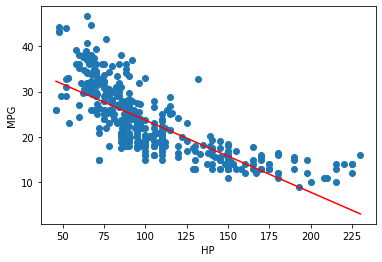

In [37]:
# plot hp and mpg
import matplotlib.pyplot as plt
plt.scatter(hp, mpg)
plt.xlabel('HP')
plt.ylabel('MPG')

# plot the regression line: undo normalization for predictions at 0.0 and 1.0
plt.plot([hp_min, hp_max], model.predict([0.0, 1.0]) * (mpg_max - mpg_min) + mpg_min, color='red')
plt.show()

We can also make use of multiple input features to predict our target feature (mpg). For the following example, we are going to use horsepower, weight, and acceleration to predict mpg. Again, we need to normalize the different features, but this time we will achieve this using functionality from Pandas.

In [38]:
# extract relevant features from dataset and normalize them
cars_hwam = cars[['horsepower', 'weight', 'acceleration', 'mpg']]
cars_n = (cars_hwam - cars_hwam.min()) / (cars_hwam.max() - cars_hwam.min())

X = cars_n[['horsepower', 'weight', 'acceleration']].values
y = cars_n['mpg']

# set up model with a single neuron using a linear activation function and MSE as loss function
model = Sequential()
model.add(Dense(1, activation='linear', input_dim=X.shape[1]))
model.compile(optimizer='SGD', loss='mean_squared_error', metrics=['mean_squared_error'])
model.fit(X, y, epochs=30, batch_size=1, verbose=0)

# determine loss, mean squared error, and mean absolute error
loss_n, mse_n = model.evaluate(X, y, verbose=0)

print('Mean squared error (MSE): %f' % mse_n)

Mean squared error (MSE): 0.012753


In [39]:
mse = mse_n * (mpg_max - mpg_min) + mpg_min

print('Mean squared error (MSE): %f' % mse)
print('Root mean squared error (MAE): %f' % math.sqrt(mse))

Mean squared error (MSE): 9.479522
Root mean squared error (MAE): 3.078883


As we can see, adding the two additional features did not give us a signficant improvement in RMSE.

## 2.4 Logistic Regression

In this first example, we want to determine the origin of cars using Logistic Regression. More precisely, we only want to distinguish between cars from the U.S. and cars that are not from the U.S. -- remember that Logistic Regression is a binary classification method. As input features we will use horsepower and weight and determine suitable binary values for the origin feature.

In [40]:
# determine (n x 2) data matrix from normalized horsepower values
X = cars_n[['horsepower', 'weight']].values

# replace origin for Japanese and European cars by 0
y = cars['origin'].replace([1,2,3], [1,0,0]).values

model = Sequential()
model.add(Dense(1, activation='sigmoid', input_dim=X.shape[1]))
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=30, batch_size=1, verbose=0)
loss, acc = model.evaluate(X, y, verbose=0)

print('Accuracy: %f' % acc)

Accuracy: 0.775510


Using these two input features, we obtain an accuracy above 75%, which means that 3 out of 4 cars are classified correctly. We next plot the data points in the weight-horsepower space. Cars from the U.S. are shown in blue; cars from outside the U.S. are shown in red. The black line shows the decision boundary if we choose $\tau = 0.5$.

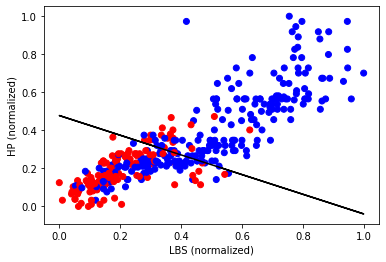

In [41]:
# determine intercept and slope of straight line corresponding to decision boundary
weights = model.get_weights()
intercept = (0.5 - weights[1][0]) / weights[0][1]
slope = (weights[0][0] / weights[0][1])

# plot data points and decision boundary
cols = ['blue' if o==1 else 'red' for o in y]
plt.scatter(cars_n['weight'].values, cars_n['horsepower'].values, color=cols)
plt.plot(cars_n['weight'], intercept - slope*cars_n['weight'], color='black')
plt.xlabel('LBS (normalized)')
plt.ylabel('HP (normalized)')
plt.show()

In this second example, we again want to determine the origin of cars using Logistic Regression. More precisely, we only want to distinguish between cars from the U.S. and cars that are not from the U.S. As a first step, we thus need to derive suitable target values from the origin feature.

In [42]:
# we are going to reuse our data matrix from the previous multiple linear regression example
X = cars_n[['horsepower', 'weight', 'acceleration', 'mpg']].values

# replace origin for Japanese and European cars by 0
y = cars['origin'].replace([1,2,3], [1,0,0]).values

# set up a model with a single neuron using a sigmoid activation function and binary cross entropy as loss function
model = Sequential()
model.add(Dense(1, activation='sigmoid', input_dim=X.shape[1]))
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=30, batch_size=1, verbose=0)
loss, acc = model.evaluate(X, y, verbose=0)

print('Accuracy: %f' % acc)

Accuracy: 0.770408


Here, we end up with an accuracy above 77%, which means that more than 3 out of 4 cars have been classified correctly. Taking into account two additional features helped to improve our classification accuracy.

## 2.5 Gradient Descent

In the following, we look at a proof-of-concept implementation of Gradient Descent. We revisit the problem of predicting (normalized) mpg based on (normalized) horsepower and use the sum of squared errors (SSE) as a loss function. The initial values for the two parameters $w_0$ and $w_1$ are determined randomly to lie in $[100,200]$. What you can observe when running the code is that the parameter choice of Gradient Descent moves toward the minimum, which is easy in this case, since our loss function is convex. Also observe that the components of the gradient computed become closer and closer to zero, while the value of the loss function decreases over time.

By playing the values of the learning rate and the number of epochs, you can observe some typical problems of standard Gradient Descent. For instance, if we choose a learning rate that is too large, the computation quickly suffers from numerical issues (e.g., overflows of the gradient).

Current parameters: (118.000000, 180.000000)


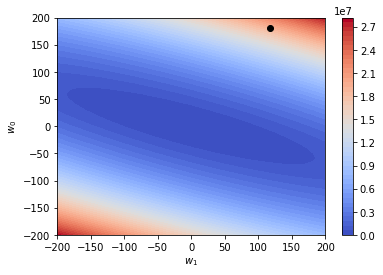

Gradient: (137054.265495, 49737.735465)
Loss: 12538665.589455
Current parameters: (-19.054265, 130.262265)


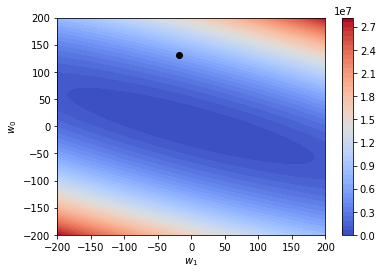

Gradient: (17212.537685, 9953.743317)
Loss: 482744.398798
Current parameters: (-36.266803, 120.308521)


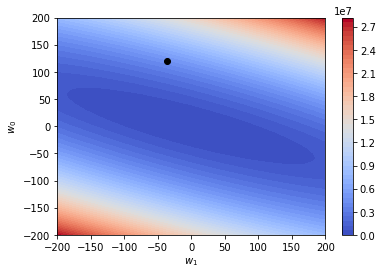

Gradient: (1238.127740, 4536.953070)
Loss: 251834.675666
Current parameters: (-37.504931, 115.771568)


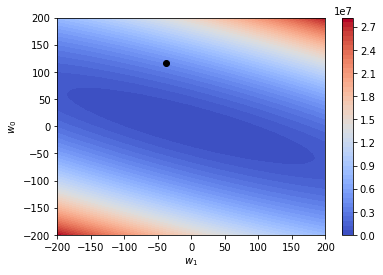

Gradient: (-862.857499, 3714.067111)
Loss: 232885.113749
Current parameters: (-36.642073, 112.057501)


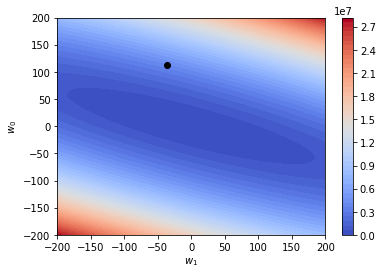

Gradient: (-1111.664374, 3507.904935)
Loss: 218621.803822
Current parameters: (-35.530409, 108.549596)


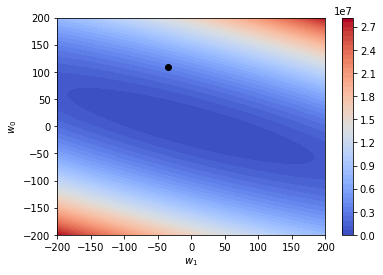

Gradient: (-1114.045386, 3387.104197)
Loss: 205291.164417
Current parameters: (-34.416364, 105.162492)


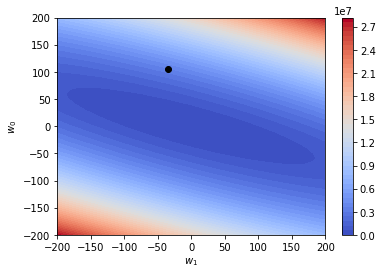

Gradient: (-1084.464545, 3280.593852)
Loss: 192774.450471
Current parameters: (-33.331899, 101.881898)


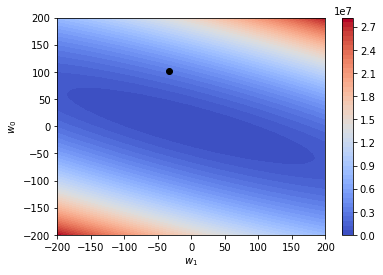

Gradient: (-1051.540114, 3178.790888)
Loss: 181020.930876
Current parameters: (-32.280359, 98.703107)


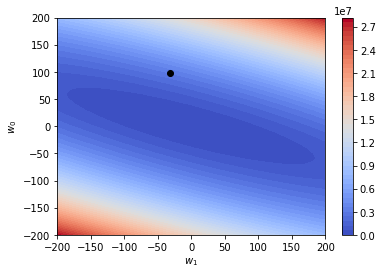

Gradient: (-1019.066221, 3080.328561)
Loss: 169984.052127


In [43]:
import math
import random

# sum of squared errors
def sse(x, y, w0, w1):
    return sum((y[i] - (w0 + w1*x[i]))**2 for i in range(0, len(y)))

# gradient of sum of squared errors
def sse_gradient(x, y, w0, w1):
    w0d = -2*sum((y[i] - w0 - w1*x[i]) for i in range(0, len(y)))
    w1d = -2*sum((y[i] - w0 - w1*x[i])*x[i] for i in range(0, len(y)))
    return (w0d, w1d)

# read the car data
y = cars_n['mpg'].values
x = cars_n['horsepower'].values

# prepare data for contour plot
W0 = np.arange(-200, 201, 10)
W1 = np.arange(-200, 201, 10)
n = len(W0)
m = len(W1)
Z = np.matrix(np.empty([n,m]))
for i in range(0, n):
    for j in range(0, m):
        Z[i,j] = sse(x, y, W0[i], W1[j])

# determine random initial parameters in [100,200]
w0c, w1c = random.randint(100,201), random.randint(100,201)

# number of epochs, was 1000
n_epochs = 10 #1000

# learning rate
learning_rate = 1e-3

# run gradient descent
for epoch in range(1, n_epochs):
    # plot contour
    plt.contourf(W1, W0, Z, 50, cmap=plt.cm.coolwarm, vmax=Z.max(), vmin=Z.min())
    plt.xlabel('$w_1$')
    plt.ylabel('$w_0$')
    plt.colorbar()  
    
    # print/plot current parameters
    print("Current parameters: (%f, %f)" % (w0c, w1c))
    plt.scatter(w0c, w1c, color='black')

    plt.show()
    
    # compute gradient
    (w0u, w1u) = sse_gradient(x, y, w0c, w1c)
    print("Gradient: (%f, %f)" % (w0u, w1u))
    print("Loss: %f" % sse(x, y, w0c, w1c))
    
    # update current parameters
    w0c = w0c - learning_rate*w0u
    w1c = w1c - learning_rate*w1u

## 2.6 Evaluation

Next, we look at how the concepts covered on the slides can be implemented using Pandas and Keras.

### Splitting the Data into Training, Validation, and Test Data

We will first make use of Pandas to split our data into training, validation, and test data. Note that there are other ways to accomplish this, for instance, by using sklean or numpy.

In [44]:
# percentages used for training, validation, and test data
train_perc = 0.60
val_perc = 0.20
test_perc = 0.20

# determine random permutation of DataFrame indexes
perm = np.random.permutation(cars_hwam.index)

# determine end indexes of training and validation data
train_end = int(train_perc*len(perm))
val_end = train_end + int(val_perc*len(perm))

# extract training, validation, and test data
cars_train = cars_hwam.iloc[perm[:train_end]]
cars_val = cars_hwam.iloc[perm[train_end:val_end]]
cars_test = cars_hwam.iloc[perm[val_end:]]

print("Cars in training/validation/test data are %d/%d/%d" % (len(cars_train), len(cars_val), len(cars_test)))

Cars in training/validation/test data are 235/78/79


An alternative way to implement this is to use sklearn as follows:

In [45]:
from sklearn.model_selection import train_test_split

# extract training data and temporary validation-test data
cars_train, cars_tmp = train_test_split(cars_hwam, test_size=val_perc+test_perc)

# split validation-test data into validation and test data
cars_val, cars_test = train_test_split(cars_tmp, test_size=test_perc/(val_perc+test_perc))

print("Cars in training/validation/test data are %d/%d/%d" % (len(cars_train), len(cars_val), len(cars_test)))

Cars in training/validation/test data are 235/78/79


### k-Fold Cross Validation

While k-Fold Cross Validation can be implemented in a similar manner, it is easiest to make use of the functionality  built into sklearn.

In [46]:
from sklearn.model_selection import KFold

# initialize 5-fold cross validation
cv = KFold(n_splits=5, shuffle=True)
for train_index, test_index in cv.split(cars_hwam):
    print("Number of training data points: %d" % len(train_index))
    print("Number of test data points: %d" % len(test_index))

Number of training data points: 313
Number of test data points: 79
Number of training data points: 313
Number of test data points: 79
Number of training data points: 314
Number of test data points: 78
Number of training data points: 314
Number of test data points: 78
Number of training data points: 314
Number of test data points: 78


### Quality Measures for Regression

Next, we look into how the different quality measures for regression can be computed. To this end, we first train another linear regression model on our car dataset. Note that, when normalizing the data, we always use the minimum and maximum determined on the training data to avoid polluting our validation and test data.

In [47]:
import tensorflow as tf

# normalize training, validation, and test data for car dataset
cars_train_n = (cars_train - cars_train.min()) / (cars_train.max() - cars_train.min())
cars_val_n = (cars_val - cars_train.min()) / (cars_train.max() - cars_train.min())
cars_test_n = (cars_test - cars_train.min()) / (cars_train.max() - cars_train.min())

# prepare training, validation, and test data
X_train = cars_train_n[['horsepower', 'weight', 'acceleration']].values
y_train = cars_train_n['mpg']
X_val = cars_val_n[['horsepower', 'weight', 'acceleration']].values
y_val = cars_val_n['mpg']
X_test = cars_test_n[['horsepower', 'weight', 'acceleration']].values
y_test = cars_test_n['mpg']

# set up model with a single neuron using a linear activation function and MSE as loss function
model = Sequential()
model.add(Dense(1, activation='linear', input_dim=X_train.shape[1]))
model.compile(optimizer='SGD', loss='mean_squared_error', metrics=['mean_squared_error'])
model.fit(X_train, y_train, epochs=30, batch_size=1, verbose=0, validation_data=(X_val, y_val))

# make predictions for test data
y_pred = model.predict(X_test)

# compute prediction quality measures
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: %f" % mse)
print("Root Mean Squared Error: %f" % math.sqrt(mse))

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: %f" % mae)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 Coefficient of Determination: %f" % r2)

Mean Squared Error: 0.017671
Root Mean Squared Error: 0.132932
Mean Absolute Error: 0.099304
R2 Coefficient of Determination: 0.719850


### Quality Measures for Classification

In the following, we use logistic regression to classify our cars according to their origin.

In [48]:
from sklearn.model_selection import train_test_split

# extract training data and temporary validation-test data
cars_train, cars_tmp = train_test_split(cars, test_size=val_perc+test_perc)

# split validation-test data into validation and test data
cars_val, cars_test = train_test_split(cars_tmp, test_size=test_perc/(val_perc+test_perc))

# normalize data -- note that origin can not be normalized
X_train = cars_train[['horsepower', 'weight', 'acceleration']].values
X_train_n = (X_train - X_train.min(axis=0)) / (X_train.max(axis=0) - X_train.min(axis=0))
X_val = cars_val[['horsepower', 'weight', 'acceleration']].values
X_val_n = (X_val - X_train.min(axis=0)) / (X_train.max(axis=0) - X_train.min(axis=0))
X_test = cars_test[['horsepower', 'weight', 'acceleration']].values
X_test_n = (X_test - X_train.min(axis=0)) / (X_train.max(axis=0) - X_train.min(axis=0))

# make origin binary
y_train = cars_train['origin'].replace([1,2,3], [1,0,0]).values
y_val = cars_val['origin'].replace([1,2,3], [1,0,0]).values
y_test = cars_test['origin'].replace([1,2,3], [1,0,0]).values

# train a logistic regression model
model = Sequential()
model.add(Dense(1, activation='sigmoid', input_dim=X_train.shape[1]))
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_n, y_train, epochs=30, batch_size=1, verbose=0, validation_data=(X_val_n, y_val))

# compute predictions by thresholding
threshold = 0.5
y_pred = model.predict(X_test_n) >= threshold

# compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print()

# compute Accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print("Accuracy: %f" % acc)

# compute Precision
from sklearn.metrics import precision_score
prec = precision_score(y_test, y_pred)
print("Precision: %f" % prec)

# compute Recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print("Recall: %f" % recall)

# compute F1
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print("F1: %f" % f1)

Confusion Matrix:
[[15 14]
 [ 1 49]]

Accuracy: 0.810127
Precision: 0.777778
Recall: 0.980000
F1: 0.867257


## 2.7 Overfitting

We will look into how to detect and counter overfitting when working with other datasets.